In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_palette("Paired")
sns.set_context('paper')

# Visualize DQN Results

In [35]:
results_path = "experiments/"
dueling_dqn = pd.read_csv(results_path + "MLP_agent_stats.csv")
dueling_dqn.columns.values

array(['Unnamed: 0', 'opt_counter', 'rew_mean', 'rew_sd', 'rew_median',
       'rew_10th_P', 'rew_90th_p', 'steps_mean', 'steps_sd',
       'steps_median', 'steps_10th_P', 'steps_90th_p'], dtype=object)

In [65]:
its.shape

(237,)

In [66]:
its = dueling_dqn.loc[:150, "opt_counter"]
rew_med = dueling_dqn.loc[:150, "rew_median"]
rew_10 = dueling_dqn.loc[:150, "rew_10th_P"]
rew_90 = dueling_dqn.loc[:150, "rew_90th_p"]

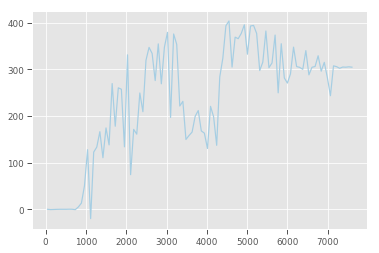

In [67]:
from scipy.interpolate import make_interp_spline, BSpline

its_n = np.linspace(its.min(),its.max(), 100)
spl = make_interp_spline(its, rew_med, k=3)
power_smooth = spl(its_n)

plt.plot(its_n, power_smooth)

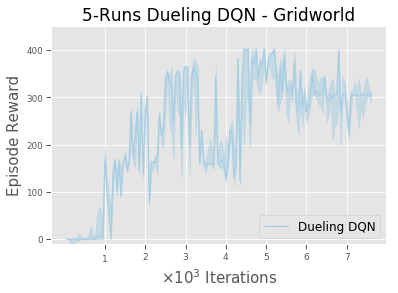

In [68]:
its_ticks = np.arange(1000, np.max(its), 1000)
its_labels_temp = [str(int(it/1000)) for it in its_ticks]
its_labels = [it_l for it_l in its_labels_temp]
its_labels[0] = r"$1$"
        
plt.plot(figsize=(15,15))
rew_p = plt.plot(its, rew_med, label="Dueling DQN")
plt.fill_between(its, rew_10, rew_90, color=rew_p[0].get_color(), alpha=0.5)

plt.ylabel("Episode Reward", fontsize=15)
plt.ylim(bottom=-10, top=450)
plt.xlabel(r"$\times 10^3$ Iterations", fontsize=15)
plt.legend(fontsize=12, loc=4)
plt.title("5-Runs Dueling DQN - Gridworld", fontsize=17)
plt.xticks(its_ticks, its_labels, fontsize=9)
#plt.tight_layout()
plt.savefig("figures/mlp_ddqn_learning_curve.png", dpi=300)